<a href="https://colab.research.google.com/github/GataullinaLili/praktikaII/blob/master/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание на практику

##Загрузка данных

In [ ]:
import requests
import urllib
import os
import numpy as np

In [ ]:
def download_yad(link):
    url = f"https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key={link}"
    response = requests.get(url)
    download_url = response.json()["href"]
    file_name = urllib.parse.unquote(download_url.split("filename=")[1].split("&")[0])
    save_path = os.path.join("/content/", file_name)

    with open(save_path, "wb") as file:
        download_response = requests.get(download_url, stream=True)
        for chunk in download_response.iter_content(chunk_size=1024):
            if chunk:
                file.write(chunk)
                file.flush()

In [ ]:
download_yad("https://disk.yandex.ru/d/H6D2Pzz7OWEM3g")
!tar -xvf /content/testing.tar.xz
download_yad("https://disk.yandex.ru/d/OKHg5U86q1REWg")
!tar -xvf /content/training.tar.xz

##Установка библиотек

In [ ]:
!pip install open3d catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Atte

##Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import scipy

import open3d as o3d

from tqdm import tqdm
import os

from typing import List, Dict,Tuple,Any

import catboost
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split,KFold,GroupKFold,StratifiedGroupKFold,StratifiedKFold

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Описание практического задания
<img src="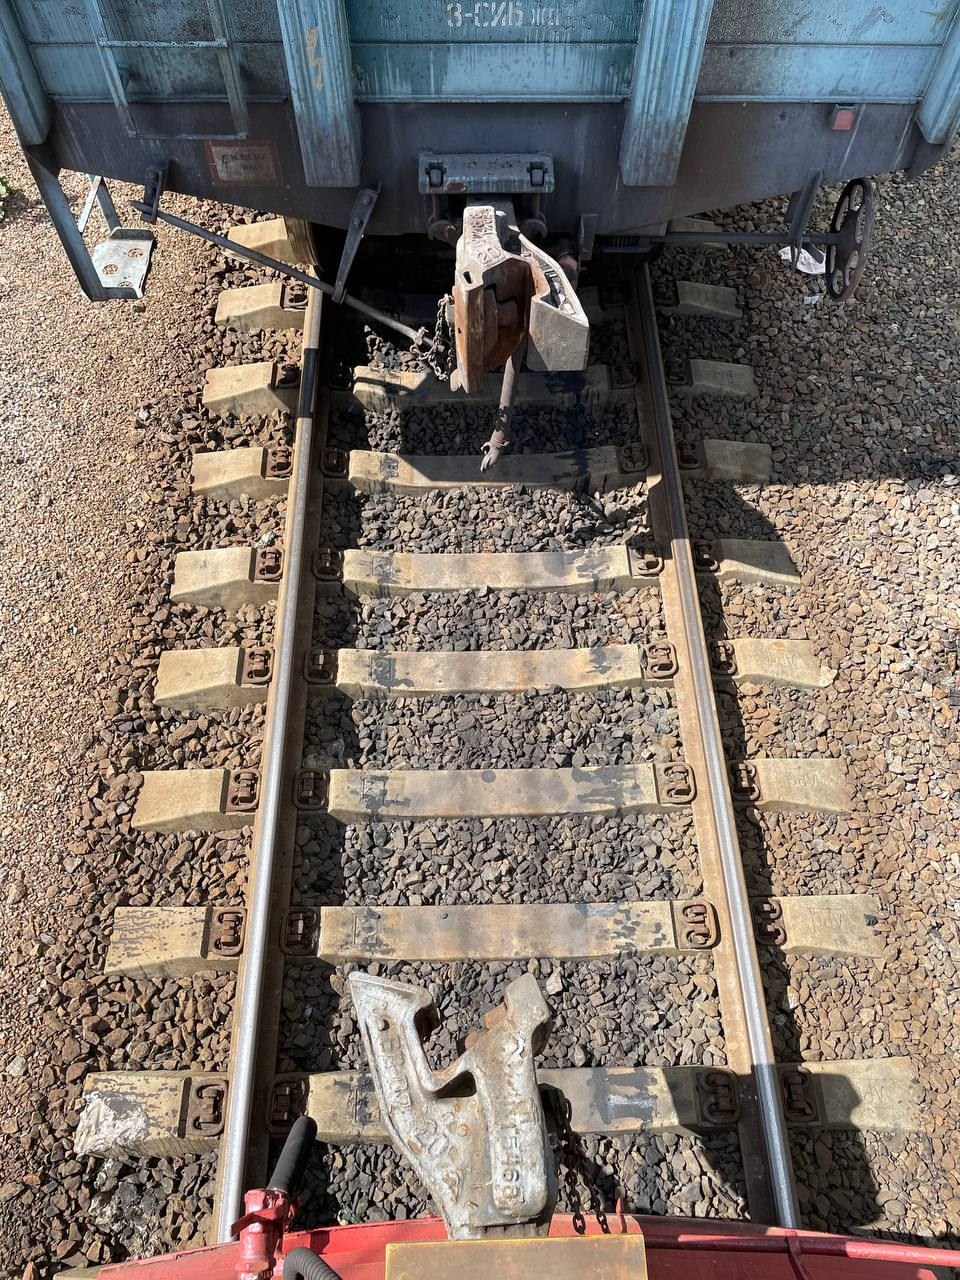

В рамках данного практического задания вам необходимо решить задачу сегментации облака точек сцепки на наборе данных NIIAS с использованием классического подхода. Задание разделено на следующий набор шагов :
<br />
***
**Шаг 1.** Определение имен классов в наборе данных
<br />
***
**Шаг 2.** Реализация класса формирующего набор данных для обучения
<br />
***
**Шаг 3.** Реализация функции для визуализации полученного набора данных
<br />
***
**Шаг 4.** Реализация класса для обучения и тестирования модели
<br />
***
**Шаг 5.** Обучение модели и эксперименты, достижение начальных значений метрик
<br />
***
**Шаг 6.** Улучшение кода засчет самостоятельно выбранных подходов с целью достижения максимальных метрик качества
<br />
***

# Реализация домашнего задания.
## Базовый подход:
В рамках шаблона для реализации Шаг 2 - Шаг 5 сформирован заранее подготовленный набор функций, где вашей задачей является имплементация согласно описанию перед каждым из шагов. Вы можете следовать этим шагам для выполнения домашнего задания. **На шаге 6 предполагается внесение своих модификаций в програмнный код**

## Альтернативный подход.
Вы можете не пользоваться подготовленным шаблоном, а сразу с шага 2 писать собственный код. Основная задача - **получить требуемые уровни метрик**(шаг 5 и 6),**реализовать визуализацию**(шаг 3), а также **в вашем коде должен содержаться алгоритм для подсчета признаков из шага 2**(вы можете его дополнить, при желании закомментировать ненужные признаки, но реализация в коде должна быть)

# Подсчет метрик
В рамках требуемого для имплементации на шаге 4 класса используется библиотека Catboost(https://catboost.ai/) , в качестве метрики - **Weighted F1**(https://catboost.ai/en/docs/concepts/loss-functions-multiclassification#F1).
<br />
<br />
При реализации кода самостоятельно **идентичной метрикой не привязанной к Catboost** является реализация в библиотеке sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) , во время инициализации в конструктор нужно передать значение 'weighted' в переменную 'average'





## Реализация датасета для загрузки данных


***
В рамках данного задания необходимо реализовать класс, функции которого выполняют следующие пунткы
***
**1. Загрузка данных облака точек из файла**:
<br />
  Функция - read_points_from_file
***
**2. Загрузка данных о всех сценах содержащихся в наборе данных**:
<br />
  Функция - load_from_directory
***
**3. Создание k-d дерева из облака точек**:
<br />
  Функция - create_kdtree
Для знакомства с API Open3d обратитесь к следующему материалу:
https://www.open3d.org/docs/latest/tutorial/Basic/kdtree.html
***
**4. Поиск k соседей для каждой точки из k-d дерева**:
<br />
  Функция - knn
Для знакомства с API Open3d обратитесь к следующему материалу:
https://www.open3d.org/docs/latest/python_api/open3d.geometry.KDTreeFlann.html
***
**5. Поиск соседей для каждой точки из k-d дерева c использованием метода radius search**:
<br />
  Функция - radius_search
Для знакомства с API Open3d обратитесь к следующему материалу:
https://www.open3d.org/docs/latest/python_api/open3d.geometry.KDTreeFlann.html
***
**5. Вычисление признаков на базе собственных значений найденного облака соседних точек**:
<br />
**5.1 На первом шаге необходимо вычислить собственные значения для облака соседних точек** :
$$
cov_{x,y,z}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})(z_{i}-\bar{z})}{N-1}
$$
Для вычислений можно воспользоваться:
Open3d (compute_mean_and_covariance) или Numpy (np.cov) для подсчета матрицы ковариации;
<br />


**5.2 Далее нужно вычислить собственные значения матрицы ковариации** :
<br />
Для вычислений можно воспользоваться:
Numpy (np.linalg.eig) или Scipy (scipy.linalg.eig) для нахождения собственных векторов и чисел.
<br />

Важно - итоговые собственные числа должны иметь следующий порядок:
$$
e_{1}\geq e_{2}\geq e_{3}\geq 0
$$
Для того чтобы избежать NAN и отрицательных значений:
1. Использовать в качестве облака точек набор из 3 и более точек
2. Делать clip в случае, если число меньше 0 (чаще всего отрицательные значения обусловленных численной стабильностью при вычислении)
3. В случае, если в формуле присутствует деление на одно из собственных чисел или есть выражение log(e_i), то к значению собственного числа необходимо прибавить минимальную положительную константу (например 1e-6) для избежания деления на 0 и ошибок при подсчете логарифма

После получения собственных значений можной переходить к шагу 5.3 - вычисление признаков

**5.3 В качестве признаков необходимо использовать следующие формулы**:
$$
\text{Linearity} = \frac{e_{1} - e_{2}}{e_{3}}\\
\text{Planarity} = \frac{e_{2} - e_{3}}{e_{1}}\\
\text{Scattering} = \frac{e_{3}}{e_{1}}\\
\text{Omnivariance} = 3\sqrt{e_{1}e_{2}e_{3}}\\
\text{Anisotropy} = \frac{e_{1} - e_{3}}{e_{1}}\\
\text{Eigentropy} = -\sum^3_{i=1}(\frac{e_{i}}{\sum e_{i}} - \ln{\frac{e_{i}}{\sum e_{i}}})\\
\text{Sum of eigenvalues} = e_{1} + e_{2} + e_{3}\\
\text{Change of curvative} = \text{Change of curvative} = \frac{e_{3}}{e_{1}+e_{2}+e_{3}}\\
$$

Для уточнения деталей по их вычислению, и других дополнительных тонкостей можно обратиться к следующему материалу: https://mediatum.ub.tum.de/doc/800632/941254.pdf(глава 4.3. Surface Normals and Curvature Estimates)
***
**6. Применение ранее имплементированных функций в рамках функции create_dataset**:
Данная функция на выходе должна возвращать обьект pd.DataFrame с полями согласно переменной self.feature_names




In [ ]:
class PointCloudDataset(object):
    def __init__(self,data_path: str,grouping_method: str,neighbourhood_th: Any):
          """
          In :
              data_path: str - путь до папки с данными
              grouping_method : str - метод поиска соседей , ["knn","radius_search",имплементированный вами]
              neighbourhood_th : Any[int,float] - пороговое значение для k - количества соседей или radius - радиуса сферы
          """

          self.data_path = data_path
          self.grouping_method = grouping_method
          self.neighbourhood_th = neighbourhood_th

          self.roi = [0.7, 1.4, 0, 10, -5, 5]

          self.feature_names = ['x', 'y', 'z', 'eigenvals_sum', 'linearity', 'planarity', 'change_of_curvature',
                                 'scattering', 'omnivariance', 'anisotropy', 'eigenentropy', 'label','scene_id']

    def read_points_from_file(self, filename: str) -> np.ndarray:
        """
        In :
            filename: str  Путь до файла с облаком точек
        Out :
            points : np.ndarray-> массивы точек
        """
        txt_points = open(filename, "r")
        str_points = txt_points.readlines()
        points = []
        for i in range(11, len(str_points)):
            pnt_data = str_points[i].split()
            pnt_x = float(pnt_data[0])
            pnt_y = float(pnt_data[1])
            pnt_z = float(pnt_data[2])
            intensity = float(pnt_data[3])
            points.append([pnt_x, pnt_y, pnt_z])
        return points

    def filter_by_roi(self,cloud):
        min_z, max_z, min_x, max_x, min_y, max_y = self.roi
        cloud = np.array(cloud)
        for i, axis_range in enumerate([[min_x,max_x],
                                        [min_y,max_y],
                                        [min_z,max_z]]):
            low_b, high_b = axis_range
            cloud = cloud[cloud[:, i] < high_b]
            cloud = cloud[cloud[:, i] > low_b]

        return cloud

    def load_annotation(self, cloud: np.ndarray, filename: str) -> np.ndarray:
        has_hitch = True
        fp = open(filename, "r")
        json_data = json.load(fp)
        if len(json_data["figures"]) == 0:
            has_hitch = False
            labels = self.assign_point_label(cloud,[0, 0, 0, 0, 0, 0],has_hitch)
            return labels

        if has_hitch:
            for figure in json_data["figures"]:
                couple_box = self.create_couple_bbox(figure)
            labels = self.assign_point_label(cloud,couple_box,has_hitch)
            return labels

    def assign_point_label(self, cloud, bbox, with_hitch):
        x_center, y_center, z_center, depth, width, height = bbox
        labels = []
        for point in cloud:
            x, y, z, = point
            if with_hitch == True:
                if abs(x - x_center) < depth / 2 and abs(y - y_center) < width / 2 and abs(z - z_center) < height / 2:
                    label = 1
                else:
                    label = 0
            else:
                label = 0
            labels.append([label])
        return np.array(labels)

    def create_couple_bbox(self,figure):
        data_point = figure["geometry"]
        x_center = (data_point["position"]["x"])
        y_center = (data_point["position"]["y"])
        z_center = (data_point["position"]["z"])
        depth = data_point["dimensions"]["x"]
        width = data_point["dimensions"]["y"]
        height = data_point["dimensions"]["z"]
        return [x_center,y_center,z_center,depth,width,height]

    def load_from_directory(self, directory: str) -> Tuple[List[np.ndarray],List[np.ndarray]]:
        """
        In :
            directory: str  Путь до директории с файлами
        Out :
            all_points, all_labels : Tuple[List[np.ndarray],List[np.ndarray]] Набор точек,лейблов для каждой сцены
        """

        all_points = []
        all_labels = []
        for dataset in os.listdir(directory):
            ann_path = f"{directory}{dataset}/ann"
            points_path = f"{directory}{dataset}/pointcloud"
            files = os.listdir(points_path)
            for point_cloud in files:
                point_cloud_path = os.path.join(points_path,point_cloud)
                ann_file_path = os.path.join(ann_path,point_cloud+".json")

                points = self.read_points_from_file(point_cloud_path)
                labels = self.load_annotation(points,ann_file_path)

                all_points.append(points)
                all_labels.append(labels)

        return all_points, all_labels

    def create_kdtree(self, points :np.ndarray)-> Tuple[o3d.geometry.PointCloud,o3d.geometry.KDTreeFlann]:
        """
        In :
            points: np.ndarray  Облако точек
        Out :
            pcd, tree : Tuple[o3d.geometry.PointCloud,o3d.geometry.KDTreeFlann] - облако точек, k-d дерево
        """

        #TODO инициализируем представение облака точек open3d и построим k-d дерево

        return pcd, tree

    def knn(self, pcd: o3d.geometry.PointCloud, tree: o3d.geometry.KDTreeFlann, query_index : int, k: int) -> np.ndarray:
        """
        In :
            pcd: o3d.geometry.PointCloud  Облако точек
            tree : o3d.geometry.KDTreeFlann k - d дерево (https://www.open3d.org/docs/latest/python_api/open3d.geometry.KDTreeFlann.html)
            query_index : int Индекс точки в дереве для которой нужно найти соседей
            k : int Количество ближайших соседей для поиска
        Out :
            points: np.ndarray  -> найденные точки(включая query_index)
        """

        #TODO Найдем индексы точек окресности с учетом заданного k

        return np.array(pcd.points)[indices]

    def radius_search(self, pcd: o3d.geometry.PointCloud, tree: o3d.geometry.KDTreeFlann, query_index : int, radius: float) -> np.ndarray:
        """
        In :
            pcd: o3d.geometry.PointCloud  Облако точек
            tree : o3d.geometry.KDTreeFlann k - d дерево (https://www.open3d.org/docs/latest/python_api/open3d.geometry.KDTreeFlann.html)
            query_index : int Индекс точки в дереве для которой нужно найти соседей
            radius : float Радиус сферы , в метрах
        Out :
            points: np.ndarray  -> найденные точки(включая query_index)
        """

        #TODO Найдем индексы точек окресности с учетом заданного radius
        return np.array(pcd.points)[indices]

    def get_eugen_stats(self, neighbourhood_points: np.ndarray) -> Tuple[float, ...]:
        """
        In :
            neighbourhood_points: np.ndarray  Облако соседних точек найденных с помощью knn или radius_search
        Out :
            feautes: Tuple[float, ...]  -> признаки вычисленные по данному облаку точек
        """

        # Шаг 1. Найдем собственные значения : TODO

        # Шаг 2. Найдем собственные значения : TODO

        # Шаг 3. Вычислим признаки : TODO

        # sum of eigenvalues

        # TODO: linearity

        # TODO: planarity

        # TODO: scattering

        # TODO: omnivariance

        # TODO: anisotropy

        # TODO: eigentropy

        # TODO: change of curvative

        return sum_of_eigenvalues, linearity, planarity, change_of_curvature, \
        scattering, omnivariance, anisotropy, eigenentropy

    def create_dataset(self) -> pd.DataFrame:
      """
        In :

        Out :
            dataframe : pd.DataFrame Датафрейм с данными, согласно названиям колонок из self.feature_names
        """

      # Шаг 1. Загрузка данных всех сцен из указанной директории(self.data_path) : TODO

      # Шаг 2. Итерирование по сценам : TODO

        # Шаг 3. Создание kdtree : TODO

        # Шаг 4. Итерирование по всем точкам из kdtree : TODO

            # Шаг 5. Поиск соседей одним из методов - knn или radius search : TODO

            # Шаг 6. Вычисление признаков : TODO

            # Шаг 7. Заполнение списка описанием точки [x,y,z,features,label,scene_id] - 1x13 : TODO

      #Шаг 8. Формирование DataFrame : TODO
      return dataframe






### Получим тренировочный набор данных

In [ ]:
train_data_path = "/content/training" # Путь до тренировочных данных
method =  # Метод поиска соседей
neighbourhood_th = # Количество соседей или радиус
train_dataset = PointCloudDataset(train_data_path,method,neighbourhood_th)
train_dataframe = train_dataset.create_dataset()

### Получим тестовый набор данных

In [ ]:
test_data_path = "/content/testing"
method = # Метод поиска соседей
neighbourhood_th = # Количество соседей или радиус
test_dataset = PointCloudDataset(test_data_path,method,neighbourhood_th)
test_dataframe = test_dataset.create_dataset()

## Реализация функции для загрузки данных (5 баллов)
### Ожидаемый результат:
Тестовые данные(scene_id == 0) :

<img src="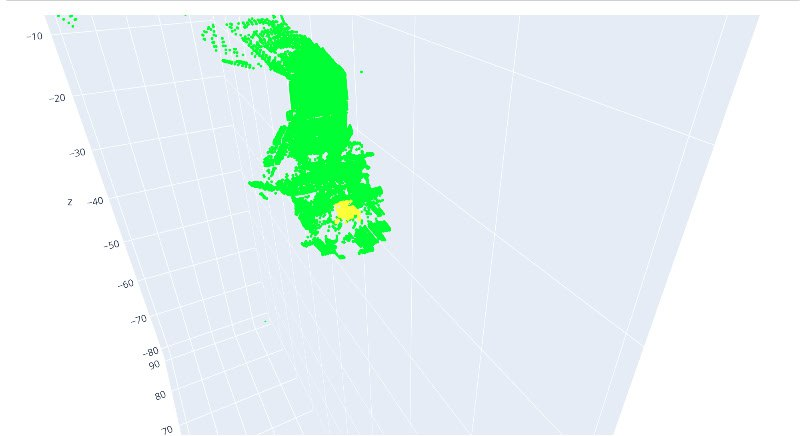

In [ ]:

color_map = {
      0: (0, 1, 0),      # background
      1: (1, 1, 0),      # hitch
    }



def visualize_point_cloud(points: np.ndarray, colors: np.ndarray) -> go.Figure:
    """
    In :
       points : np.ndarray - Облако точек (x,y,z) [N,3]
       labels : np.ndarray - Индексы лейблов [N]
    Out :
       fig : go.Figure - график в плотли
    """

    #TODO Реализовать функцию визуализации данных где палитра определяется индексом класса
    return fig

### Визуализируем тестовые данные

In [ ]:
scene_0 = test_dataframe[test_dataframe["scene_id"] == 0]
points  = scene_0.to_numpy()[:,:3]
labels = scene_0.to_numpy()[:,-2]
colors = [color_map[label] for label in labels]

In [ ]:
visualize_point_cloud(points, colors)

### Визуализируем сцену из тренировочных данных

In [ ]:
scene_1 = train_dataframe[train_dataframe["scene_id"] == 550]
points  = scene_1.to_numpy()[:,:3]
labels = scene_1.to_numpy()[:,-2]
colors = [color_map[label] for label in labels]

In [ ]:
visualize_point_cloud(points, colors)

## Реализация класса Trainer для обучения и тестирования модели (15 баллов)


В рамках данного задания необходимо реализовать класс, функции которого выполняют следующие пункты
***
**1. Разбиение тренировочных данных на n фолдов**:
<br />
  Функция - create_folds
  В данной функции можно выбрать один из методов from sklearn.model_selection
***
**2. Реализация функции для тренировки модели**:
<br />
  Функция - train_catboost
Для знакомства с API Catboost (https://catboost.ai/en/docs/concepts/python-reference_catboost_fit)
***
**3. Реализация функции для проверки модели на тестовых данных**:
<br />
  Функция - test_catboost
API Catboost - eval_metrics (https://catboost.ai/en/docs/concepts/python-reference_catboost_fit)
***
**4. Реализация функции для обучения и тестирования модели на n фолдах**:
<br />
  Функция - fit
***
**5. Реализация функции получения лучшей по качеству на test модели**:
<br />
  Функция - return_best
***




In [ ]:
class Trainer(object):
  def __init__(self,train_data : pd.DataFrame, test_data: pd.DataFrame, model_config: Dict, n_folds: int):
      """
      In :
          train_data: pd.DataFrame - таблица с данными для тренировки
          test_data: pd.DataFrame - таблица с данными для тестирования
          model_config : Dict - словарь с параметрами модели
          n_folds : int - количество фолдов
      """

      self.model_params = model_config
      self.n_folds = n_folds
      self.train_data = train_data
      self.test_data = test_data
      self.metrics = ['TotalF1:average=Micro', 'Accuracy']
      self.folds = self.create_folds()

  def create_folds(self) -> List[List[np.ndarray]]:
      """
      In :
          self.train_data : pd.DataFrame  - тренировочные данные
          self.n_folds : int - количество фолдов
      Out :
          kfold_dset_index : List[List[np.ndarray]] - список пар индексов train_index,val_index для каждого из n фолдов
      """

      #TODO Поделим тренировочную выборку на фолды , можно воспользоваться одним из методов sklearn.model_selection

      return kfold_dset_index

  def train_catboost(self, train_pool: catboost.Pool, val_pool: catboost.Pool) -> catboost.CatBoostClassifier:
      """
      In :
          train_pool : catboost.Pool - инициализированный коеструктор для тренировочных данных (относящихся к train_index)
          val_pool : catboost.Pool - инициализированный коеструктор для валидационных данных (относящихся к val_index)
      Out :
          catboost_model : catboost.CatBoostClassifier - обученная модель
      """

      #TODO Инициализация и обучение модели

      return catboost_model

  def test_catboost(self, test_pool: catboost.Pool, catboost_model:catboost.CatBoostClassifier) -> List[float]:
      """
      In :
          test_pool : catboost.Pool - инициализированный коеструктор для тестовых данных (относящихся к self.test_data)
          catboost_model : catboost.CatBoostClassifier - обученная модель
      Out :
          metric_values : List[float] - значение метрик для комбинации всех деревьев (https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_eval-metrics ntree_end)
      """

      #TODO Подсчет метрик на тестовой выборке с использованием обученной модели

      return metric_values

  def fit(self):
      """
      In :
          self.train_data: pd.DataFrame - таблица с данными для тренировки
          self.test_data: pd.DataFrame - таблица с данными для тестирования
          self.folds : List[List[np.ndarray]] - список пар индексов train_index,val_index для каждого из n фолдов

      Out :
          self.f1_list : List[float] - список из значений метрики F1(average = Weighted) на тестовой выборке для каждой из обученных моделей
          self.acc_list : List[float] - список из значений метрики Accuracy на тестовой выборке для каждой из обученных моделей
          self.models_list : List[catboost.CatBoostClassifier] - список из обученных на каждом из фолдов моделей
      """

      # Шаг 1. Сформируем X,y X_test y_test убрав нужные колонки из pd.DataFrame :
      X = self.train_data.drop(columns=["label","scene_id"])
      y = self.train_data['label']

      X_test = self.test_data.drop(columns=["label","scene_id"])
      y_test = self.test_data['label']

      # Шаг 2. Проинициализируем self.f1_list,self.acc_list,self.models_list :
      self.f1_list=[]
      self.acc_list=[]
      self.models_list = []

      # Шан 3. Итерирование по self.folds : TODO


          # Шаг 4. Создадим X_train,y_train X_val,y_val используя индексы фолдов : TODO

          # Шаг 5. Инициализируем train_pool , val_pool : TODO

          # Шаг 5. self.train_catboost : TODO

          # Шаг 6. Инициализируем test_pool из X_test,y_test : TODO

          # Шаг 7. self.test_catboost : TODO

          # Шаг 8. Запишем полученные метрики и модель в созданные списки :
          self.f1_list.append(f1)
          self.acc_list.append(acc)
          self.models_list.append(catboost_model)

          del X_train,y_train,X_val,y_val,train_pool,val_pool,test_pool,catboost_model


      # Шаг 9. Выведем среднее и стандартное отклонение полученных по n фолдам метрик
      print('\n================================')
      print(f"F1={np.mean(self.f1_list)} +/- {np.std(self.f1_list)}")
      print(f"Accuracy={np.mean(self.acc_list)} +/- {np.std(self.acc_list)}")


  def return_best(self):
      """
      In :
          self.f1_list : List[float] - список из значений метрики F1(average = Weighted) на тестовой выборке для каждой из обученных моделей
          self.models_list : List[catboost.CatBoostClassifier] - список из обученных на каждом из фолдов моделей

      Out :
          self.f1_list : List[float] - список из значений метрики F1(average = Weighted) на тестовой выборке для каждой из обученных моделей
          self.acc_list : List[float] - список из значений метрики Accuracy на тестовой выборке для каждой из обученных моделей
          self.models_list : List[catboost.CatBoostClassifier] - список из обученных на каждом из фолдов моделей
      """
      #TODO Выбор лучшей из n обученных моделей на базе значений метрики F1

      return model




### Обучим модель на n фолдах

In [ ]:
params = #{ параметры модели }
n_folds = # количество фолдов
trainer = Trainer(train_dataframe,test_dataframe,params,n_folds)
trainer.fit()

### Получим наилучшую модель

In [ ]:
best_model = trainer.return_best()

### Получим предсказание для одной сцены тестового набора данных

In [ ]:
scene = test_dataframe[test_dataframe["scene_id"] == 0]
X_test = scene.drop(columns=["label","scene_id"])
y_test = scene['label']
y_pred = best_model.predict(X_test)

### Визуализируем тестовые данные с оригинальными лейблами

In [ ]:
scene = test_dataframe[test_dataframe["scene_id"] == 0]
points  = scene.to_numpy()[:,:3]
labels = scene.to_numpy()[:,-2]
colors = [color_map[label] for label in labels]
visualize_point_cloud(points, colors)

### Визуализируем тестовые данные с предсказанными лейблами

In [ ]:
points  = scene.to_numpy()[:,:3]
labels = y_pred.reshape(-1,)
colors = [color_map[label] for label in labels]
visualize_point_cloud(points, colors)

## Улучшение качества предсказания
В рамках этого пункта можно воспользоваться следующими идеями
1. Использование muliscale подхода — признаковое описание точки формируется засчет их вычисления на локальных облаках, полученных с использованием нескольких итераций поиска с разными k или radius их их комбинациями (похожий метод описан в https://arxiv.org/abs/1808.00495)
2. Ансамблинг моделей, полученных в процессе обучения на фолдах
3. Исследование признакого пространства — удаление шумных признаков
4. Исследование пространства данных — работа с выбросами
5. Имплементация других признаков описанных в рамках cтатей:
  1. https://www.researchgate.net/publication/264089430_Semantic_3D_scene_interpretation_A_framework_combining_optimal_neighborhood_size_selection_with_relevant_features
  2. https://isprs-annals.copernicus.org/articles/III-3/177/2016/isprs-annals-III-3-177-2016.pdf

6. Использование class_weights(https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) и oversampling(https://imbalanced-learn.org/stable/over_sampling.html) для снижения диcбаланса классов
7. Аугментация данных(https://github.com/aksuko/PointCloudAugmentation)
8. Создание полусинтетических сцен с вставленными объектами классов с маленьким количеством точек(https://github.com/ctu-vras/pcl-augmentation)
9. Ваши идеи!